,feature,2017-2018,2018-2019,2019-2020
0,Percent on any financial aid,0.392108,0.334551,0.392902
1,Number in financial aid cohort,-0.008689,-0.264049,0.542096
2,Average total grant aid,0.487397,0.691738,0.761120
3,Percent of students awarded Pell grants,-1.289574,-1.268404,-1.278426
4,Total amount of Pell grant aid awarded,-0.394586,-0.580297,-0.756237
5,Average amount Pell grant aid awarded,0.167251,0.057565,0.132188
6,Percent of students awarded federal student loans,-0.294663,-0.299060,-0.263266
7,Average amount of federal student loans awarded,-0.134715,-0.088884,-0.173890
8,Level of institution,-0.076888,-0.042519,-0.097589
9,Institution size category,0.289618,0.459179,0.569541


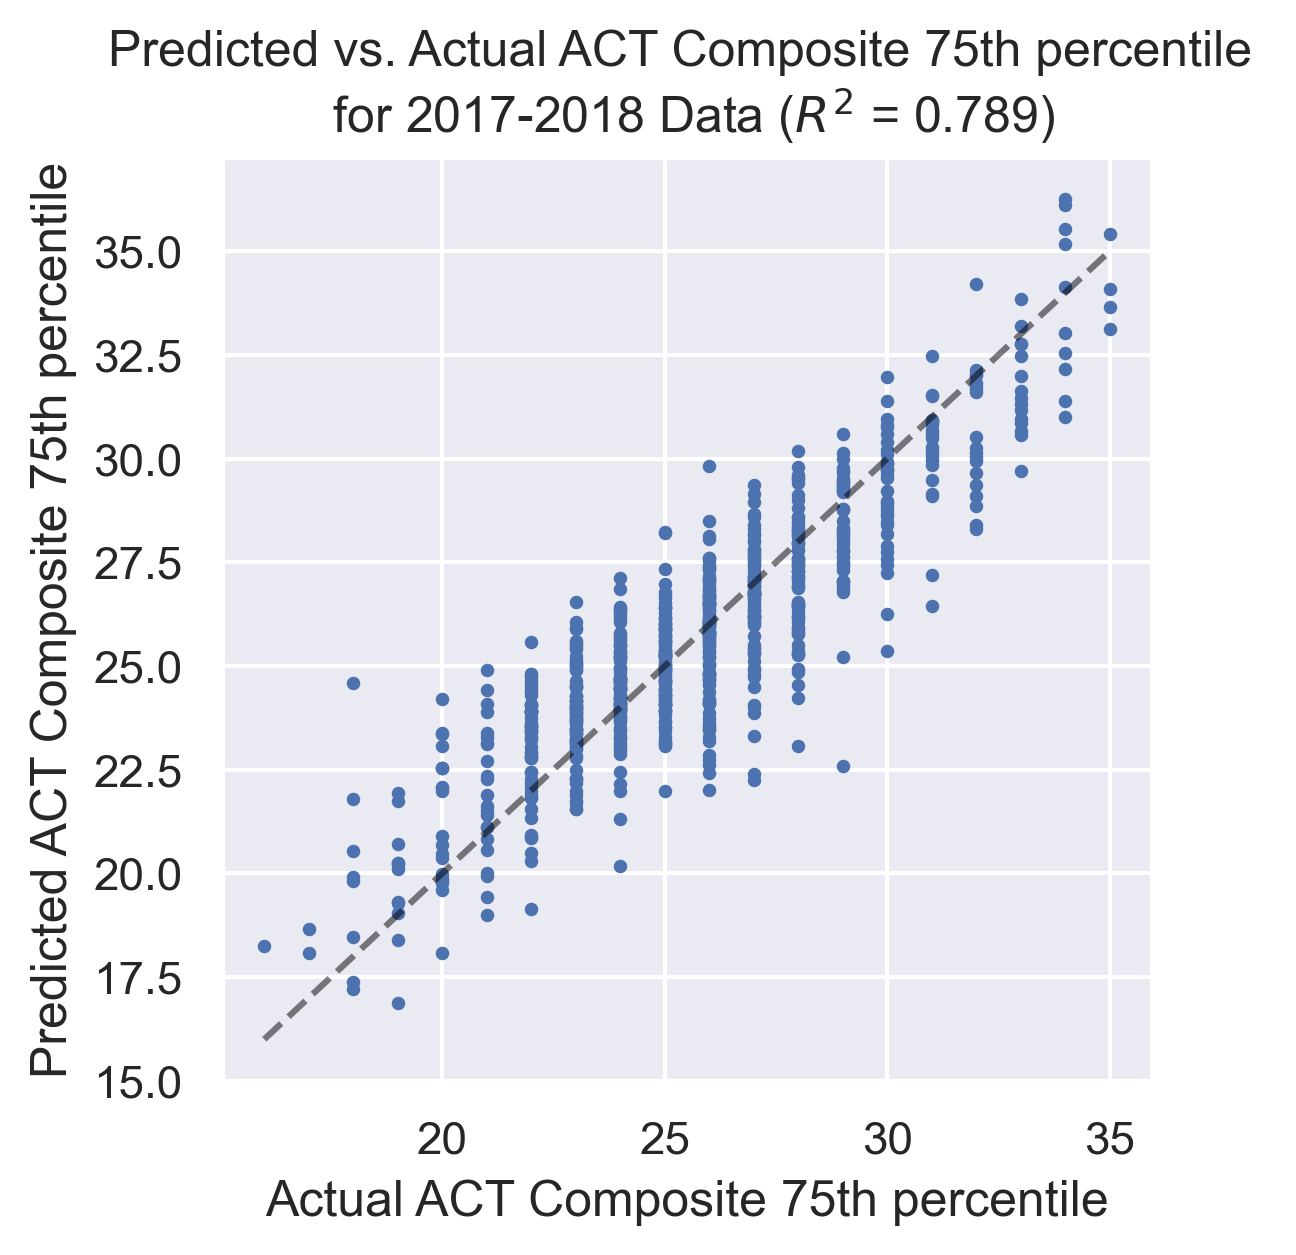

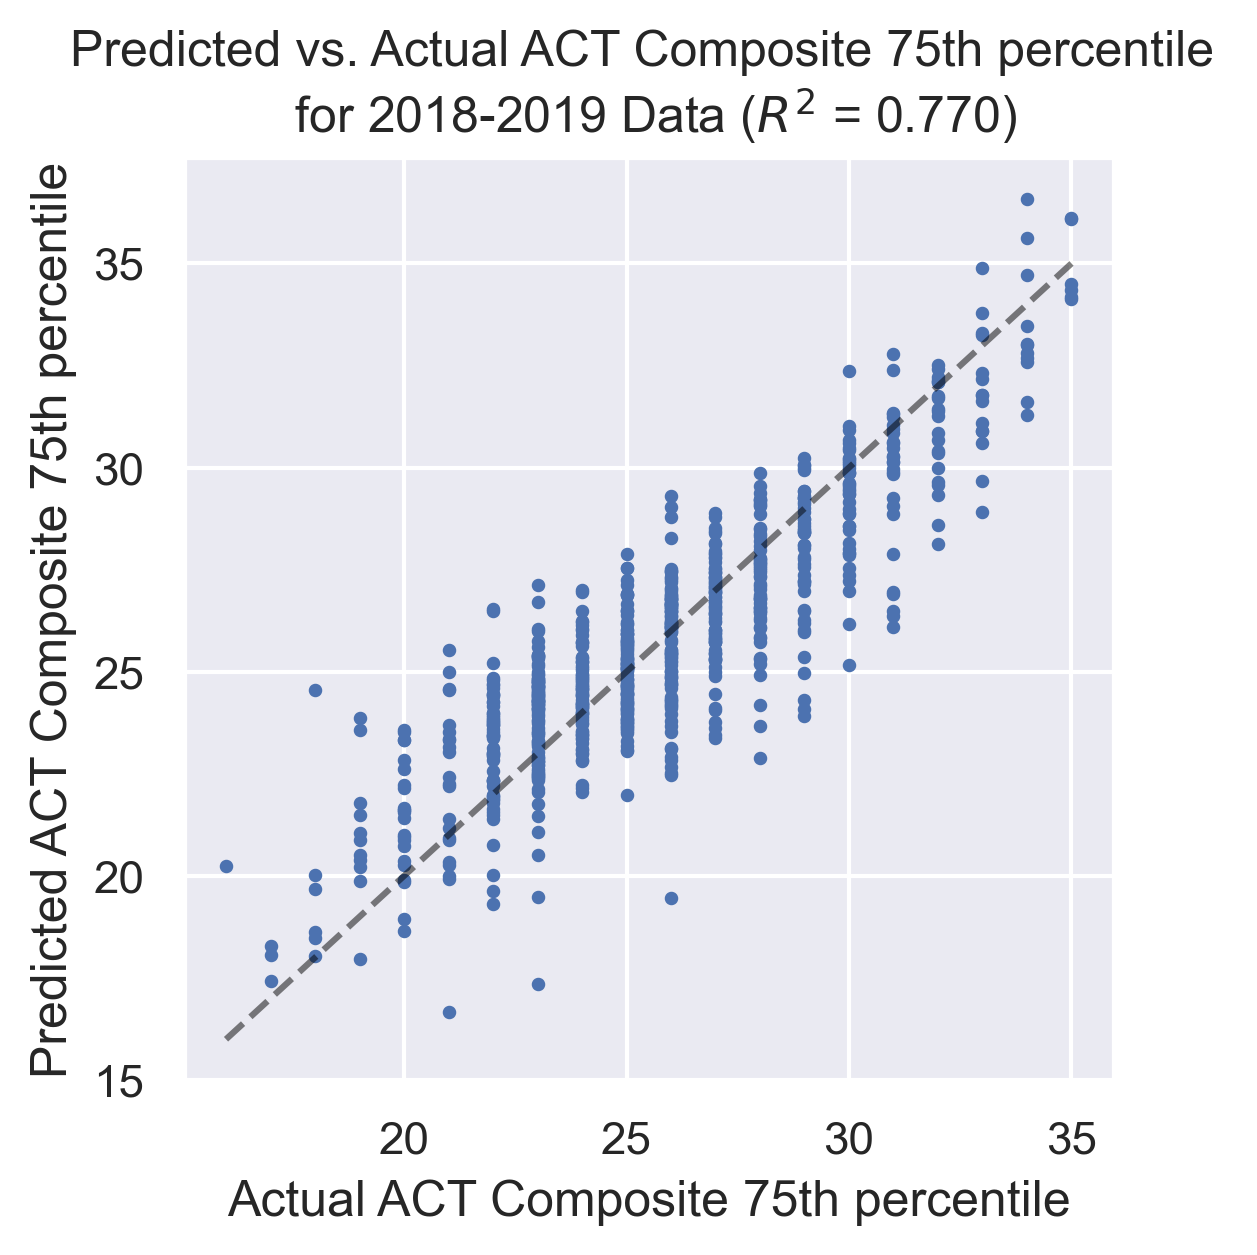

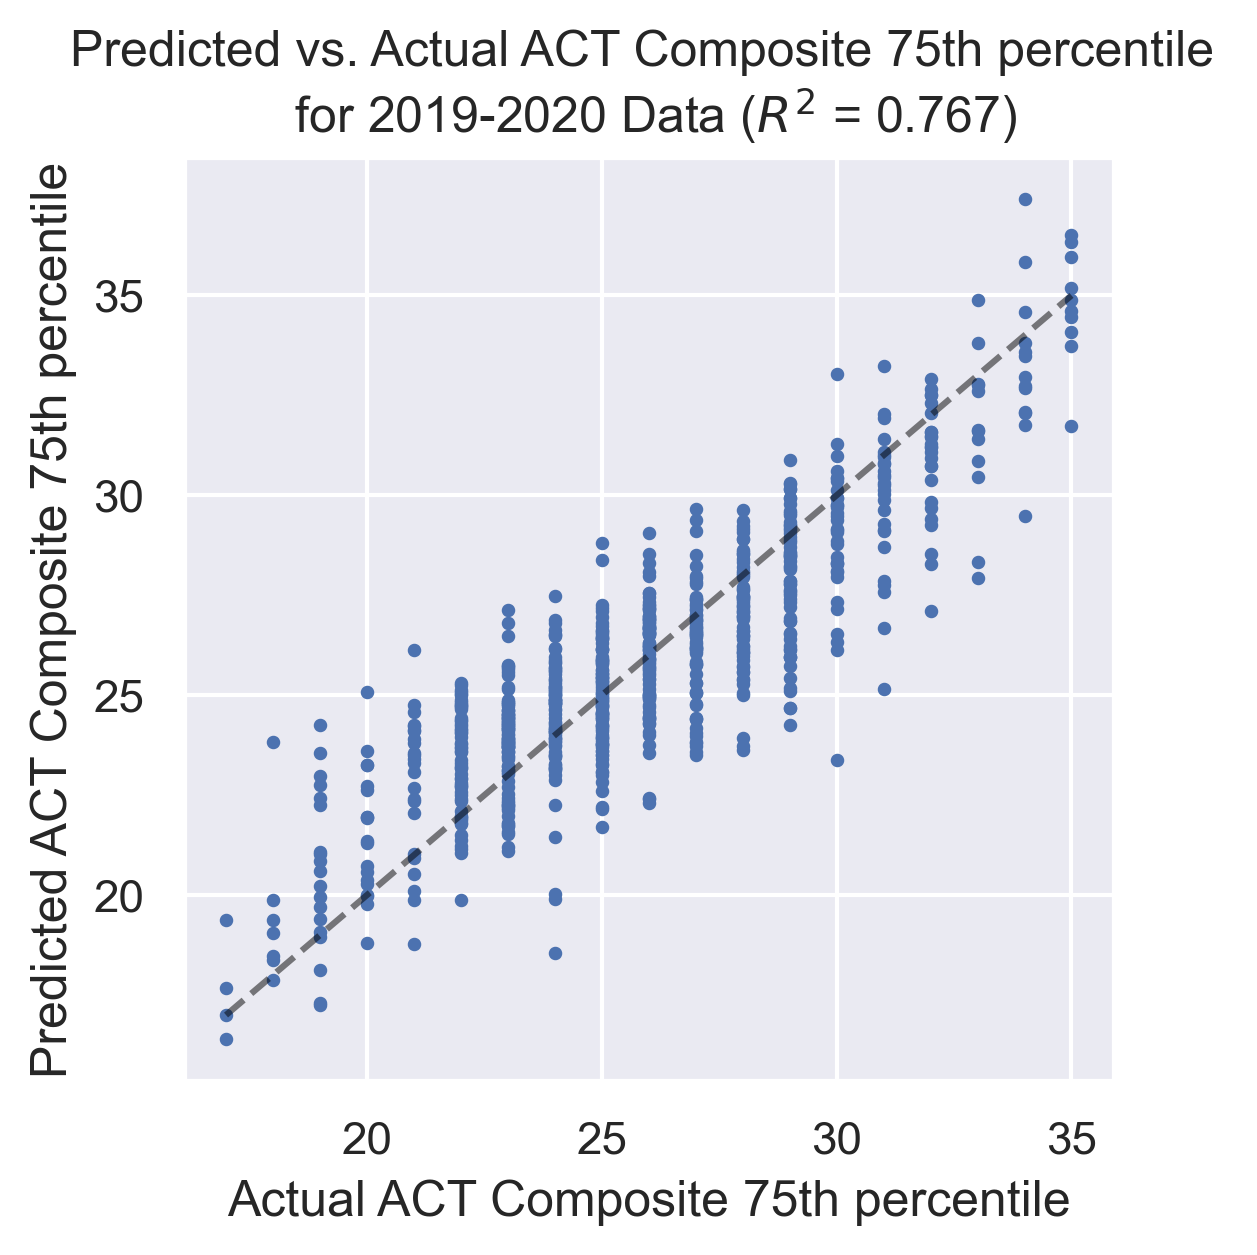

In [33]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
from sklearn.metrics import r2_score

sns.set()

# define iterable dataframes
dfs = [pd.read_csv(f'IPEDS_201{yr}.csv') for yr in range(7, 10)]
year = 17

df_coeff = pd.DataFrame()

# for each dataframe
for df in dfs:
    # setting index
    df = df.set_index('UnitID')

    # isolating x features and x data
    x_feat_list = df.columns[2:34]
    x_feat_list = x_feat_list.drop('State')

    x = df.loc[:, 'Percent on any financial aid' : 'Enrolled part time total']
    x = x.drop('State', axis = 1)
    
    x /= x.std()

    # isolating y feature and y data
    y_feat = 'ACT Composite 75th percentile'
    y = df.loc[:, y_feat]
    
    df_coeff['feature'] = x_feat_list

    # training model on data
    model =  lm.LinearRegression(normalize = True)
    model.fit(x, y) 

    # isolating coefficients
    coef = model.coef_
    intercept = model.intercept_

    # defining labels for graph
    pred_label = f'Predicted {y_feat}'
    act_label = f'Actual {y_feat}'

    # creating new dataframe with predicted and true data
    y_pred = pd.DataFrame(model.predict(x), columns = [pred_label])
    df_true_pred = pd.concat([y, y_pred], axis = 1)
    df_true_pred.T

    # calculating r2
    r2 = r2_score(y_pred = y_pred, y_true = y)

    # plotting
    plt.rcParams['figure.figsize'] = (4, 4)
    plt.figure(dpi = 300)
    plt.scatter(y, y_pred, s = 5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', c = 'black', alpha = 0.5)
    plt.xlabel(act_label)
    plt.ylabel(pred_label)
    plt.title(f'Predicted vs. Actual {y_feat} \n for 20{year}-20{year + 1} Data ($R^2$ = {r2:.3f})')

    df_coeff[f'20{year}-20{year + 1}'] = coef
    
    year += 1
    
df_coeff